This course was Funded by the European Union through the DIGIQ project (GA 101084035). Views and opinions expressed are however those of the author(s) only and do not necessarily reflect those of the European Union. Neither the European Union nor the granting authority can be held responsible for them.

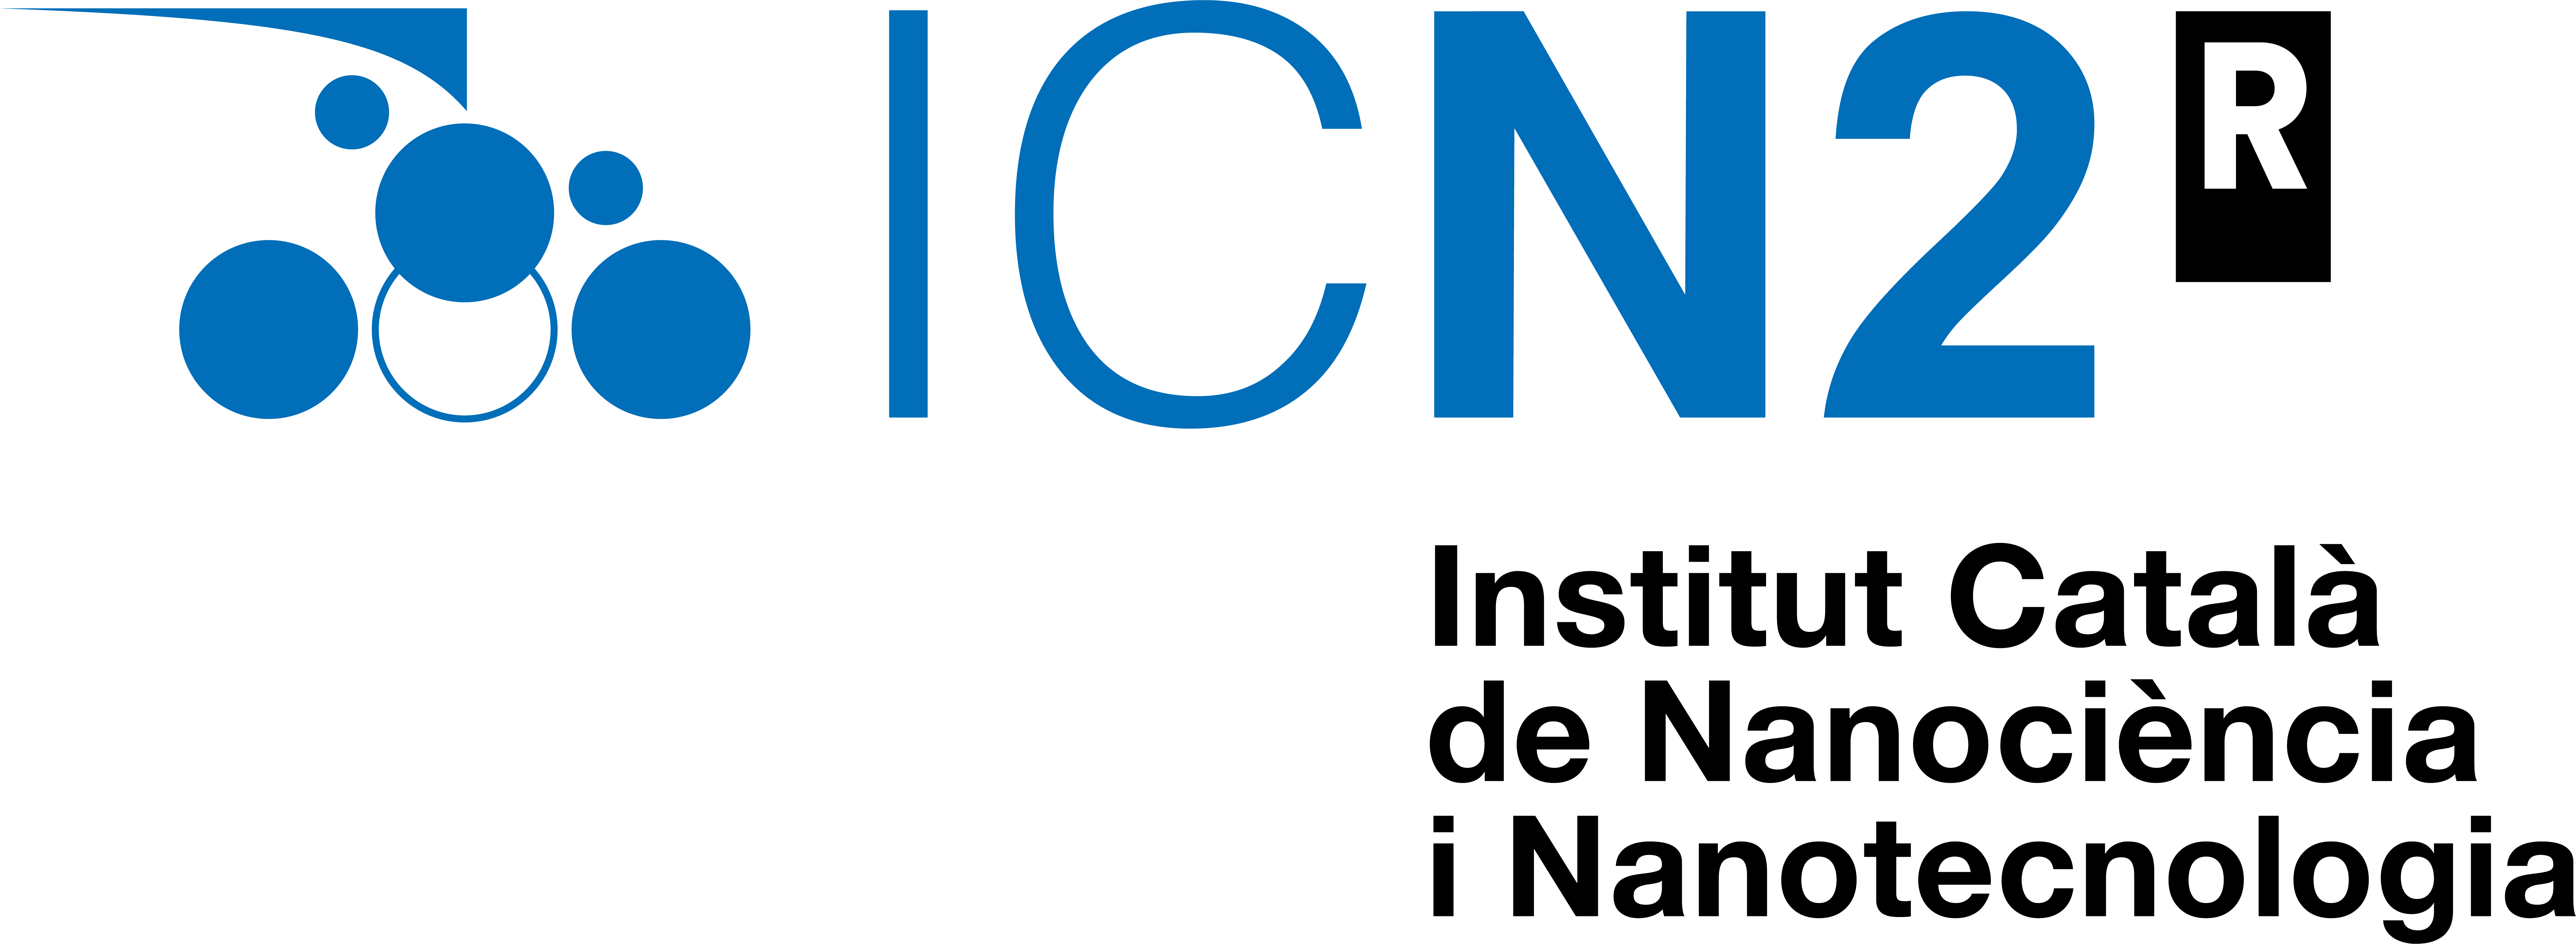

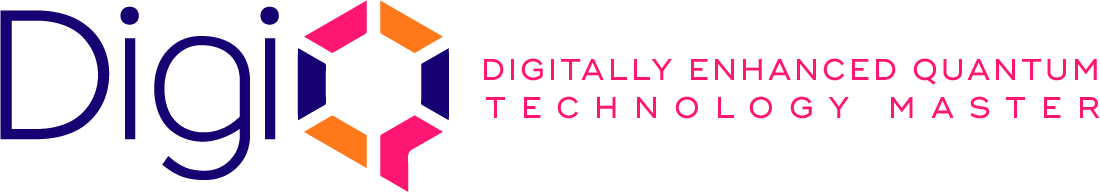

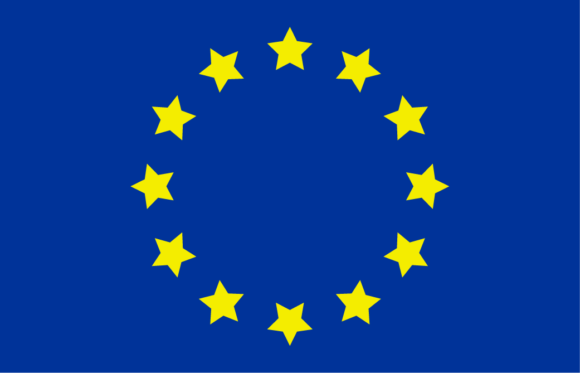


# Step 0: Python Package Installation

In [ ]:
%%bash
rm -Rf topquantmat/ && git clone https://github.com/quantummasterbarcelonacode/topquantmat.git&>log
cd topquantmat
bash pull_from_conda.sh
conda install -c conda-forge ipympl -y&>log

Installing packages for the activity
conda is installed
All requested packages already installed.


In [ ]:
from IPython.display import display, Math,Markdown #Allow to manipulate expressions and how to display them
import numpy as np  #Package for handling numerical math
import sympy as sp  #Package for handling symbolic  math
from sympy import Q #Q is a way to input constrains
from sympy import latex # Convert sympy expression into latex to render in display
from sympy import oo

#IMPORTANT
import topquantmat.tutorial as my #A package build for this session. Feel free to explore it.
import qsymm        #Package to build models using symmetries

from google.colab import output
output.enable_custom_widget_manager()

#Matplot lib is the plottong library
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

print(my.welcome)
def my_print(message):
  display(Markdown(message))
def print_eq(suffix, eq):
  display(Markdown(suffix + r" $%s$ "%latex(eq)))

def VelOP(Psi,E, coord_syst, vars ):
  D = sp.diff;  kron_delta=my.delta;
  dim = len(E);
  V = [ sp.eye(dim),sp.eye(dim) ]
  if coord_syst=="polar":
    k,phi= vars;
    for i,x in enumerate(vars):
      for m in range(dim):
        for n in range(dim):
          V[i][m,n]= D(E[m],x)* kron_delta(m,n) + (E[m]-E[n])*my.dot( Psi[m], D(Psi[n],x) );
    V[1]=V[1]/k;
    return [sp.simplify(V[0]),sp.simplify(V[1])]

Packages are loaded. ¡Welcome!


# General Definitions

In [ ]:
my_print("**Cartesian momentum**")
k_x, k_y,k_z = sp.symbols(["k_x","k_y","k_z"], real=True);
momenta= sp.Array([k_x,k_y, k_z]);

print_eq(r"$\vec{k}=$",momenta);

**Cartesian momentum**

$\vec{k}=$ $\left[\begin{matrix}k_{x} & k_{y} & k_{z}\end{matrix}\right]$ 

In [ ]:
my_print("**Polar momentum**")
k     = sp.Symbol("k",positive=True);
phi   = sp.Symbol("phi",real=True);
polar =[ (  k_x,  k*sp.cos(phi) ) ,
         (  k_y,  k*sp.sin(phi) )
         ];
print_eq(r"$\vec{k}=$",[k*sp.cos(phi),k*sp.sin(phi),k_z]);

**Polar momentum**

$\vec{k}=$ $\left[ k \cos{\left(\phi \right)}, \  k \sin{\left(\phi \right)}, \  k_{z}\right]$ 

In [ ]:
my_print("**Pauli matrices**")
sig0 = sp.Matrix([[1,    0],[0   , 1]]);
sigx = sp.Matrix([[0,    1],[1   , 0]]);
sigy = sp.Matrix([[0,-sp.I],[sp.I, 0]]);
sigz = sp.Matrix([[1,    0],[0   ,-1]]);
spins= [sigx,sigy,sigz];

for i,spin in zip(('x','y','z'),spins):
  print_eq(r"$\sigma_{%s}=$"%i,spin);

**Pauli matrices**

$\sigma_{x}=$ $\left[\begin{matrix}0 & 1\\1 & 0\end{matrix}\right]$ 

$\sigma_{y}=$ $\left[\begin{matrix}0 & - i\\i & 0\end{matrix}\right]$ 

$\sigma_{z}=$ $\left[\begin{matrix}1 & 0\\0 & -1\end{matrix}\right]$ 

 # hexagonal Boron-Nitride

We will use graphene as a basis and adjust the symmetries accordingly

## Geometry

In [ ]:
sites= ['a', 'b']
norbs=( ("a",1), ("b",1) )

my_print("**Lattice vectors**")
lat_vec= my.graphene.lat_vec;
for i,lat in enumerate(lat_vec):
  print_eq(r'$ \vec{a}_{%d}=$'%i,lat);

my_print("**Hopping vector**")
hop_v= -(lat_vec[0]+lat_vec[1])/3 ;
hopping_vectors = [ ( 'a', 'b', hop_v) ];
print_eq(r'$\vec{\delta}=$',hop_v);

**Lattice vectors**

$ \vec{a}_{0}=$ $\left[\begin{matrix}\frac{1}{2} & \frac{\sqrt{3}}{2} & 0\end{matrix}\right]$ 

$ \vec{a}_{1}=$ $\left[\begin{matrix}- \frac{1}{2} & \frac{\sqrt{3}}{2} & 0\end{matrix}\right]$ 

$ \vec{a}_{2}=$ $\left[\begin{matrix}0 & 0 & 1\end{matrix}\right]$ 

**Hopping vector**

$\vec{\delta}=$ $\left[\begin{matrix}0 & - \frac{\sqrt{3}}{3} & 0\end{matrix}\right]$ 

## Symetries

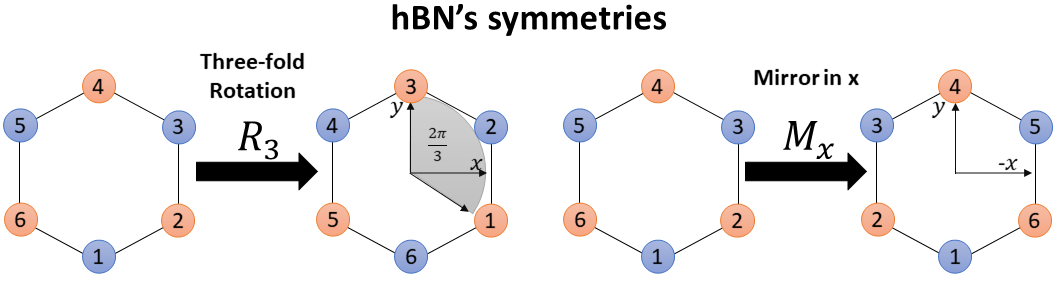

In [ ]:
my_print("**Rotation matrix**")
R = my.Rz(2*sp.pi/3);
print_eq(r'$R_3=$',R);
C3 = qsymm.groups.PointGroupElement(R ,U= np.array(sig0, dtype=int) )

my_print("**Mirror along $z$**")
R = sp.diag(1,1,-1);
print_eq(r'$M_z=$',R);
Mz= qsymm.groups.PointGroupElement(R ,U= np.array(sig0, dtype=int) )

my_print("**Mirror along $x$**")
R = sp.diag(-1,1,1);
print_eq(r'$M_x=$',R);
Mx= qsymm.groups.PointGroupElement(R ,U= np.array(sig0, dtype=int) )

my_print("**Time Reversal Symmetry**")
TR= qsymm.time_reversal(realspace_dim=3,U= np.array(sig0, dtype=int) )
print_eq(r'${\rm TR}=K$',sp.Matrix(TR.R));


**Rotation matrix**

$R_3=$ $\left[\begin{matrix}- \frac{1}{2} & - \frac{\sqrt{3}}{2} & 0\\\frac{\sqrt{3}}{2} & - \frac{1}{2} & 0\\0 & 0 & 1\end{matrix}\right]$ 

**Mirror along $z$**

$M_z=$ $\left[\begin{matrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & -1\end{matrix}\right]$ 

**Mirror along $x$**

$M_x=$ $\left[\begin{matrix}-1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{matrix}\right]$ 

**Time Reversal Symmetry**

${\rm TR}=K$ $\left[\begin{matrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{matrix}\right]$ 

## Symmetry-based models

### The tight-binding

In [ ]:
#Determine the model using the symmetries
symmetries = [C3,Mz,Mx,TR];
E_0,Delta,t = sp.symbols(["varepsilon_0","Delta","t"], positive=True);
family= qsymm.bloch_family(hopping_vectors,symmetries, norbs, momenta=momenta,bloch_model=False);
#gmodel =qsymm.hamiltonian_generator.hamiltonian_from_family(family).subs(*my.euler);
gmodel =qsymm.hamiltonian_generator.hamiltonian_from_family(family,coeffs=[E_0-Delta,E_0+Delta,t]).subs(*my.euler);

my_print("**The tight-binding model**")
print_eq("$H=$",gmodel)

**The tight-binding model**

$H=$ $\left[\begin{matrix}- \Delta + \varepsilon_{0} & t e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} + t e^{- \frac{\sqrt{3} i k_{y}}{3}} + t e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}}\\t e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} + t e^{\frac{\sqrt{3} i k_{y}}{3}} + t e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} & \Delta + \varepsilon_{0}\end{matrix}\right]$ 

In [ ]:
my_print(r"**The dispersion relation**")
my_print(r" Replace $\varepsilon_0\rightarrow 0$")
H = gmodel.subs(E_0,0);

my_print(r" Compute the eigenvalues")
Es= H.eigenvals();
Es= [ sp.trigsimp(E_k.rewrite(sp.cos)) for E_k in Es ];

for i,E_k in enumerate(Es):
  suffix = r"$E_{%d}(\vec{k})=$"%i
  print_eq( suffix,E_k)

**The dispersion relation**

 Replace $\varepsilon_0\rightarrow 0$

 Compute the eigenvalues

$E_{0}(\vec{k})=$ $- \sqrt{\Delta^{2} + 4 t^{2} \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 2 t^{2} \cos{\left(k_{x} \right)} + 3 t^{2}}$ 

$E_{1}(\vec{k})=$ $\sqrt{\Delta^{2} + 4 t^{2} \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 2 t^{2} \cos{\left(k_{x} \right)} + 3 t^{2}}$ 

 Replace $t\rightarrow 1$

 The reciprocal lattice vectors

$B=$ $\left[\begin{matrix}2 \pi & - 2 \pi & 0\\\frac{2 \sqrt{3} \pi}{3} & \frac{2 \sqrt{3} \pi}{3} & 0\\0 & 0 & 2 \pi\end{matrix}\right]$ 

**Numerical plot of Graphene's dispersion**

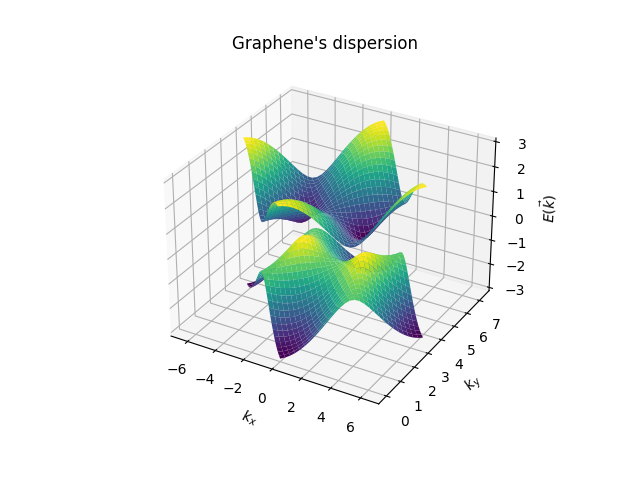

In [ ]:
my_print(r" Replace $t\rightarrow 1$");
nEs= [ sp.lambdify( [k_x,k_y], E_k.subs(t,1).subs(Delta,0.3) ) for E_k in Es ];

my_print(" The reciprocal lattice vectors");
rec_vec = 2*sp.pi*sp.Matrix(lat_vec).inv()
print_eq("$B=$", rec_vec)

my_print("**Numerical plot of Graphene's dispersion**");

fig = plt.figure();
ax = plt.axes(projection='3d');
ax.set_title('Graphene\'s dispersion ');
ax.set_xlabel(r'$k_x$'); ax.set_ylabel(r'$k_y$');
ax.set_zlabel(r'$E(\vec{k})$');

#Generate the numerical data
n=30;
for nE in nEs:
  #Compute the energies over the whole BZ
  xyz = [];
  for k_1 in np.linspace(0,1,n):
    for k_2 in np.linspace(0,1,n):
      kvec        = sp.Matrix([k_1,k_2,0]);
      nkx, nky,nkz= np.array( rec_vec*kvec ,dtype=float ).flatten();
      xyz.append( [nkx,nky,nE(nkx,nky)] );

  #Reshape the data by prepare
  KX,KY,Ek =[ x.reshape(n,n) for x in np.array(xyz).T];
  ax.plot_surface(KX,KY,Ek, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none');

### The low-energy $(\vec{k}\cdot\vec{p})$ Hamiltonian

In [ ]:
my_print(r"Replace $t\rightarrow 2v/\sqrt{3} $")
v= sp.Symbol("v", positive=True);
H = H.subs(t,2*v/sp.sqrt(3));

my_print(r"**Low energy Hamiltonians**")
for sK, K in zip( (r"$\vec{K}_0$",r"$\vec{K}_1$"),
                  (my.graphene.K0,my.graphene.K1)):
  kpH = my.FirstOrderTaylor( H, x=momenta, x0=K  );
  print_eq(sK+"=", sp.Array(K) )
  print_eq(r"$H(\vec{k})=$", kpH );

Replace $t\rightarrow 2v/\sqrt{3} $

**Low energy Hamiltonians**

$\vec{K}_0$= $\left[\begin{matrix}\frac{4 \pi}{3} & 0 & 0\end{matrix}\right]$ 

$H(\vec{k})=$ $\left[\begin{matrix}- \Delta & v \left(- k_{x} - i k_{y}\right)\\v \left(- k_{x} + i k_{y}\right) & \Delta\end{matrix}\right]$ 

$\vec{K}_1$= $\left[\begin{matrix}- \frac{4 \pi}{3} & 0 & 0\end{matrix}\right]$ 

$H(\vec{k})=$ $\left[\begin{matrix}- \Delta & v \left(k_{x} - i k_{y}\right)\\v \left(k_{x} + i k_{y}\right) & \Delta\end{matrix}\right]$ 

 ### Berry Curvature

We will define the foolowing variables: \\
$r_k = \sqrt{ \Delta^2 + k^2 v^2}$ \\
$\cos \theta_k = \Delta/r_k$ \\
$\sin \theta_k = kv/r_k$ \\
$\theta_k \in (0,\pi/2],\quad r_k>0$

In [ ]:
r_k, theta_k = sp.symbols(["r_k","theta_k"],positive=True);

expr_rK = sp.sqrt(Delta**2+k**2*v**2);
conv_polar = [( expr_rK , r_k ),
              ( k*v     , r_k*sp.sin(theta_k) ),
              ( Delta   , r_k*sp.cos(theta_k) ),
              ];
conv_cart  = [( r_k, expr_rK ),
              ( sp.sin(theta_k), k*v/expr_rK ),
              ( sp.cos(theta_k), Delta/expr_rK ),
              ( sp.sin(theta_k/2), (1/sp.sqrt(2))*sp.sqrt(1-Delta/expr_rK) ),
              ( sp.cos(theta_k/2), (1/sp.sqrt(2))*sp.sqrt(1+Delta/expr_rK) ),
              ];

In [ ]:
my_print("Computing the eigenvectors in polar coordinates")
kpH = my.FirstOrderTaylor( H, x=momenta, x0=my.graphene.K1  );
E,Psi_orig = my.EigenSystem(kpH,coord_syst=polar);
for i,x in enumerate(Psi_orig):
  Psi = r"$\Psi_%d(k,\phi)$="%i;
  print_eq(Psi, x.T)

my_print("Replace some variables for convenience")
Psi_vpol = [ my.half_angles( x.subs(conv_polar), theta_k) for x in Psi_orig];
for i,x in enumerate(Psi_vpol):
  expr1= sp.I * sp.sin(phi)- sp.cos(phi);
  expr2=-sp.exp(-sp.I*phi);
  Psi = r"$\Psi_%d(k,\phi)$="%i;
  x  = sp.simplify(x).subs(expr1,expr2);
  print_eq(Psi, x.T)

Computing the eigenvectors in polar coordinates

$\Psi_0(k,\phi)$= $\left[\begin{matrix}\frac{\left(- \Delta - \sqrt{\Delta^{2} + k^{2} v^{2}}\right) e^{- i \phi}}{\sqrt{k^{2} v^{2} + \left(\Delta + \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}} & \frac{k v}{\sqrt{k^{2} v^{2} + \left(\Delta + \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}}\end{matrix}\right]$ 

$\Psi_1(k,\phi)$= $\left[\begin{matrix}\frac{\left(- \Delta + \sqrt{\Delta^{2} + k^{2} v^{2}}\right) e^{- i \phi}}{\sqrt{k^{2} v^{2} + \left(\Delta - \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}} & \frac{k v}{\sqrt{k^{2} v^{2} + \left(\Delta - \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}}\end{matrix}\right]$ 

Replace some variables for convenience

$\Psi_0(k,\phi)$= $\left[\begin{matrix}- e^{- i \phi} \cos{\left(\frac{\theta_{k}}{2} \right)} & \sin{\left(\frac{\theta_{k}}{2} \right)}\end{matrix}\right]$ 

$\Psi_1(k,\phi)$= $\left[\begin{matrix}e^{- i \phi} \sin{\left(\frac{\theta_{k}}{2} \right)} & \cos{\left(\frac{\theta_{k}}{2} \right)}\end{matrix}\right]$ 

#### Velocity operator
$V_\alpha =\frac{1}{ i \hbar} \hbar [X_\alpha , H]$ \\
$V_\alpha =  [H , \partial_{k\alpha}]$ \\

$\langle m|\vec{V}|n\rangle=\delta_{mn}\vec{\nabla}_{k}\varepsilon_m + ( \varepsilon_m-\varepsilon_n )\langle m|\vec{\nabla}_{k}|n\rangle $

$\varepsilon_m\equiv \varepsilon_m(\vec{k})$

**In polar coordinates** \\
$\vec{\nabla} = \hat{u}_r \partial_r  + (1/r)\hat{u}_\phi\partial_\phi $




**Implementation in python** At the beginning of the notebook

































































































































































































































































































**The calculation**

In [ ]:
my_print("**Let us invert the k-dependent variables**")
Psi_vcar = [ my.exps2trig(sp.simplify(x.subs(conv_cart))) for x in Psi_vpol ];
for i,x in enumerate(Psi_vcar):
  psi = r"$\Psi_%d(k,\phi)$="%i;
  print_eq(psi, x.T)

my_print("**Compute the velocity in polar coordinates**")
v_k,v_phi = VelOP(Psi_vcar,E, "polar", [k,phi] );
v_k  = my.half_angles(sp.simplify(v_k.subs(conv_polar)), theta_k);
v_phi= my.half_angles(sp.simplify(v_phi.subs(conv_polar)),theta_k).subs(conv_cart);
for sv,vv in zip( (r"$V_k$",r"$V_\phi$"), (v_k,v_phi) ):
  print_eq(sv+"=",vv)

my_print("**Compute the velocity in cartesian coordinates**")
v_x =sp.simplify( v_k*sp.cos(phi)+ v_phi*sp.sin(phi) );
v_y =sp.simplify(-v_k*sp.sin(phi)+ v_phi*sp.cos(phi) );
for sv,vv in zip( (r"$V_x$",r"$V_y$"), (v_x,v_y) ):
  print_eq(sv+"=",sp.simplify(vv))


**Let us invert the k-dependent variables**

$\Psi_0(k,\phi)$= $\left[\begin{matrix}\frac{\sqrt{2} \sqrt{\Delta + \sqrt{\Delta^{2} + k^{2} v^{2}}} \left(i \sin{\left(\phi \right)} - \cos{\left(\phi \right)}\right)}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}} & \frac{\sqrt{- 2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}}}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}}\end{matrix}\right]$ 

$\Psi_1(k,\phi)$= $\left[\begin{matrix}\frac{\sqrt{- 2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}} \left(- i \sin{\left(\phi \right)} + \cos{\left(\phi \right)}\right)}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}} & \frac{\sqrt{2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}}}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}}\end{matrix}\right]$ 

**Compute the velocity in polar coordinates**

$V_k$= $\left[\begin{matrix}- v \sin{\left(\theta_{k} \right)} & v \cos{\left(\theta_{k} \right)}\\v \cos{\left(\theta_{k} \right)} & v \sin{\left(\theta_{k} \right)}\end{matrix}\right]$ 

$V_\phi$= $\left[\begin{matrix}0 & - i v\\i v & 0\end{matrix}\right]$ 

**Compute the velocity in cartesian coordinates**

$V_x$= $\left[\begin{matrix}- v \sin{\left(\theta_{k} \right)} \cos{\left(\phi \right)} & v \left(- i \sin{\left(\phi \right)} + \cos{\left(\phi \right)} \cos{\left(\theta_{k} \right)}\right)\\v \left(i \sin{\left(\phi \right)} + \cos{\left(\phi \right)} \cos{\left(\theta_{k} \right)}\right) & v \sin{\left(\theta_{k} \right)} \cos{\left(\phi \right)}\end{matrix}\right]$ 

$V_y$= $\left[\begin{matrix}v \sin{\left(\phi \right)} \sin{\left(\theta_{k} \right)} & - v \left(\sin{\left(\phi \right)} \cos{\left(\theta_{k} \right)} + i \cos{\left(\phi \right)}\right)\\v \left(- \sin{\left(\phi \right)} \cos{\left(\theta_{k} \right)} + i \cos{\left(\phi \right)}\right) & - v \sin{\left(\phi \right)} \sin{\left(\theta_{k} \right)}\end{matrix}\right]$ 

**The Berry Curvature**



$\Omega(\vec{k})= \sum_{n,m, n\neq m}2{\rm Im}\left[\frac{\langle n_k| V_x|m_k \rangle \langle m_k| V_y|n_k \rangle}{(\varepsilon_m(\vec{k})-\varepsilon_n(\vec{k}) )^2 } \right]$

In [ ]:
my_print("First we compute the Bery curvature")
Omega = 0;
for m in range(2):
  for n in range(2):
    if m != n:
      Omega =+ sp.simplify(2*sp.im( sp.simplify(v_x[n,m]*v_y[m,n]) ).subs(conv_cart)/(E[m]-E[n])**2);
print_eq(r"$\Omega(\vec{k})=$",Omega);

my_print("Then the chern number")
Chern = (1/sp.pi)*sp.integrate( sp.integrate( Omega*k , (phi,0,2*sp.pi) ), (k,0,oo));
print_eq("$n=$",Chern);

First we compute the Bery curvature

$\Omega(\vec{k})=$ $\frac{\Delta v^{2}}{2 \left(\Delta^{2} + k^{2} v^{2}\right)^{\frac{3}{2}}}$ 

Then the chern number

$n=$ $1$ 

In [ ]:
my_print("Finally the Hall conductivity")
mu = sp.Symbol("mu",positive=True);
sigma_xy = (1/sp.pi)*sp.integrate( sp.integrate( Omega*k , (phi,0,2*sp.pi) ), (k,0,oo,) );
print_eq("$\sigma_{xy}(\mu)=$",sigma_xy);



Finally the Hall conductivity

$\sigma_{xy}(\mu)=$ $1$ 

---

Task#2 Compute the Chern number of the other K point
my.graphene.K0



